In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import linear_model
from scipy.stats import linregress


Life_exc = "resources/life_expectancy_clean.csv"
life_expectancy = pd.read_csv(Life_exc )
life_expectancy.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [2]:
count = life_expectancy["Status"].value_counts()
count

Developing    2131
Developed      438
Name: Status, dtype: int64

In [3]:
developing_countries = life_expectancy.loc[life_expectancy["Status"] == "Developing",:]
developing_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [4]:
infant_deaths_gdp = developing_countries.groupby(['Year'], as_index = False).agg({"GDP Per Capita ($)" : np.mean,
                                                                                                 "Infant Deaths (%)" : np.mean})                                                             

infant_deaths_gdp.head()

,Year,GDP Per Capita ($),Infant Deaths (%)
0,2000,2389.654880,4.391549
1,2001,2405.093810,4.305634
2,2002,2604.811667,4.149296
3,2003,3103.506825,4.062676
4,2004,3721.897087,3.906338


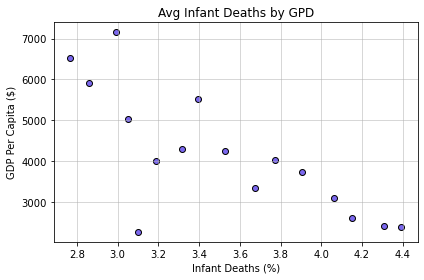

In [80]:
x_value = infant_deaths_gdp["Infant Deaths (%)"]
y_value = infant_deaths_gdp["GDP Per Capita ($)"]
plt.scatter(x_value, y_value, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Infant Deaths by GPD")
plt.xlabel("Infant Deaths (%)")
plt.ylabel("GDP Per Capita ($)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()


The r-value is 0.577138486556844


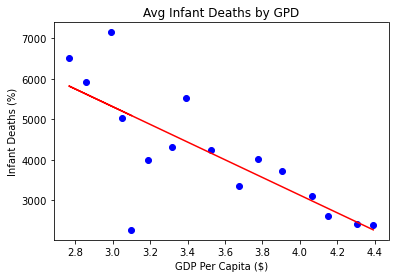

In [84]:
#USING THIS SCATTER PLOT
x_value = infant_deaths_gdp["Infant Deaths (%)"]
y_value = infant_deaths_gdp["GDP Per Capita ($)"]
(slope, intercept, rvalues, pvalue, stderr) = linregress(x_value, y_value)

plt.scatter(x_value, y_value, facecolors="blue" )
plt.plot(x_value,regress_values,"r-")
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Infant Deaths (%)')
plt.title('Avg Infant Deaths by GPD')
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.ylim(3000,7000)
#plt.xlim(2.0, 6.0)
print("The r-value is " + str(rvalue**2))


In [86]:
life_expectancy_gdp = developing_countries.groupby(['Year'], as_index = False).agg({"GDP Per Capita ($)" : np.mean,
                                                                                                 "Life Expectancy" : np.mean})                                                             

life_expectancy_gdp.head()

,Year,GDP Per Capita ($),Life Expectancy
0,2000,2389.654880,65.057746
1,2001,2405.093810,65.428873
2,2002,2604.811667,65.566197
3,2003,3103.506825,65.530986
4,2004,3721.897087,65.780986


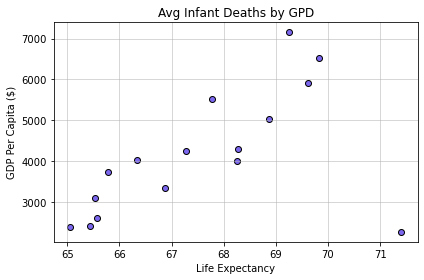

In [87]:
x_value = life_expectancy_gdp["Life Expectancy"]
y_value = life_expectancy_gdp["GDP Per Capita ($)"]
plt.scatter(x_value, y_value, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Infant Deaths by GPD")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP Per Capita ($)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

R squared: 0.28658840505509325


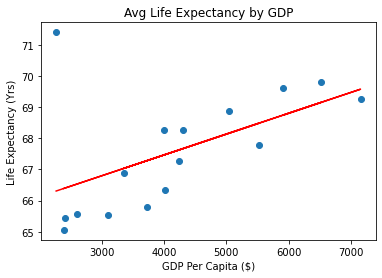

In [88]:
#USING THIS SCATTER PLOT
x_value = life_expectancy_gdp["GDP Per Capita ($)"]
y_value = life_expectancy_gdp["Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.ylabel('Life Expectancy (Yrs)')
plt.xlabel('GDP Per Capita ($)')
plt.title('Avg Life Expectancy by GDP')
print(f"R squared: {rvalue**2}")
plt.show()

In [89]:
developing_countries['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', '

In [90]:
developing_countries.set_index("Country", inplace=True)
developing_countries.head()

,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),BMI,...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,19.1,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,18.6,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,18.1,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,17.6,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,17.2,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [91]:
countries_life = life_expectancy.groupby(["Country"])

max_adult_mortality = countries_life["Adult Mortality (%)"].max()

highest_morality = pd.DataFrame({"Highest Adult Mortality (%)": max_adult_mortality})

highest_morality.sort_values(by='Highest Adult Mortality (%)', ascending=False).head(5)


,Highest Adult Mortality (%)
Country,
Zimbabwe,72.3
Botswana,69.9
Haiti,68.2
Lesotho,67.5
Malawi,61.5


In [92]:
developing_countries = pd.DataFrame({
    "Country": ["Zimbabwe", "Haiti"],
    "Adult Mortality (%)": [72.3, 68.2]})
developing_countries

,Country,Adult Mortality (%)
0,Zimbabwe,72.3
1,Haiti,68.2


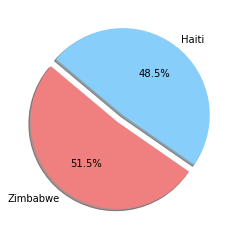

In [93]:
labels = ["Zimbabwe", "Haiti"]

sizes = [72.3, 68.2]

colors = ["lightcoral", "lightskyblue"]

explode = (0.1,0)

plt.pie(sizes, 
        explode=explode,
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140)

plt.show()

In [94]:
infant_deaths = life_expectancy.groupby(["Country"])

max_infant_deaths = infant_deaths["Infant Deaths (%)"].max()

highest_deaths = pd.DataFrame({"Highest Infant Deaths (%)": max_infant_deaths})

highest_deaths.sort_values(by='Highest Infant Deaths (%)', ascending=False).head()

,Highest Infant Deaths (%)
Country,
India,180.0
Nigeria,57.6
China,49.0
Pakistan,38.5
Ethiopia,25.3


In [95]:
developing_countries = pd.DataFrame({
    "Country": ["India", "Nigeria"],
    "Infant Deaths (%)": [180.0, 57.6]})
developing_countries

,Country,Infant Deaths (%)
0,India,180.0
1,Nigeria,57.6


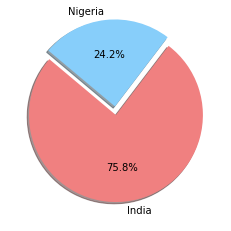

In [96]:
labels = ["India", "Nigeria"]

sizes = [180.0, 57.6]

colors = ["lightcoral", "lightskyblue"]

explode = (0, 0.1)

plt.pie(sizes, 
        explode=explode,
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140)

plt.show()